## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

Understanding basic stats of the data set

In [14]:
### You code here:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plot

%matplotlib inline
data_set = pd.read_csv('train_luc.csv')
print("Printing top 10 the required information to see available columns")
print("\n Number of total samples:", data_set.shape[0], "\n Number of total features:", data_set.shape[1])
data_set.head(10)

Printing top 10 the required information to see available columns

 Number of total samples: 9174 
 Number of total features: 12


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [2]:
data_set.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000,9174.000000
mean,2.505559,0.031284,0.678875,1.414868,20.130401,23.578433,61.715064,12.737931,35.713647,154.868106,190.581753
std,1.116618,0.174094,0.466934,0.635363,7.940504,8.617957,19.401829,8.199027,49.667738,150.981155,181.011530
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,46.000000,7.001500,4.000000,35.000000,41.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,61.000000,11.001400,16.000000,117.000000,144.000000
75%,4.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,222.000000,282.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,45.455000,100.000000,56.996900,362.000000,886.000000,977.000000


Creating a new feature

In [20]:
print("Adding another column for hour and month ")
def hour_of_day(value):
    return datetime.strptime(value, "%Y-%m-%d %H:%M:%S").time().hour
def day_of_moth(value):
    return datetime.strptime(value, "%Y-%m-%d %H:%M:%S").month
data_set['hour']= data_set['datetime'].map(hour_of_day)
data_set['month']= data_set['datetime'].map(day_of_moth)
data_set.head(10)


Adding another column for hour and month 


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,5,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,6,1
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,7,1
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,8,1
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,9,1


Array of Hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


Text(0, 0.5, 'Avg num of bikes used')

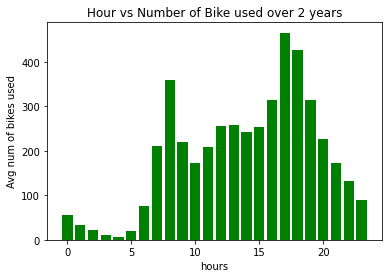

In [27]:
hr = np.unique(data_set['hour'])
print("Array of Hours:",hr)

hr_mean = {}
for x in hr:
    values = data_set.loc[data_set['hour'] == x]
    hr_mean[x] = values['count'].mean()

plot.bar(hr,[hr_mean[h] for h in hr], color='green')
plot.title("Hour vs Number of Bike used over 2 years")
plot.xlabel("hours")
plot.ylabel("Avg num of bikes used")

Array of Months: [ 1  2  3  4  5  6  7  8  9 10 11 12]


Text(0, 0.5, 'Avg num of bikes used')

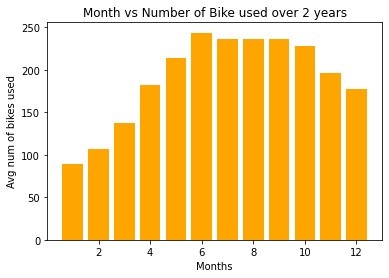

In [28]:
month = np.unique(data_set['month'])
print("Array of Months:",month)

month_mean = {}
for x in month:
    values = data_set.loc[data_set['month'] == x]
    month_mean[x] = values['count'].mean()

plot.bar(month,[month_mean[h] for h in month], color='orange')
plot.title("Month vs Number of Bike used over 2 years")
plot.xlabel("Months")
plot.ylabel("Avg num of bikes used")

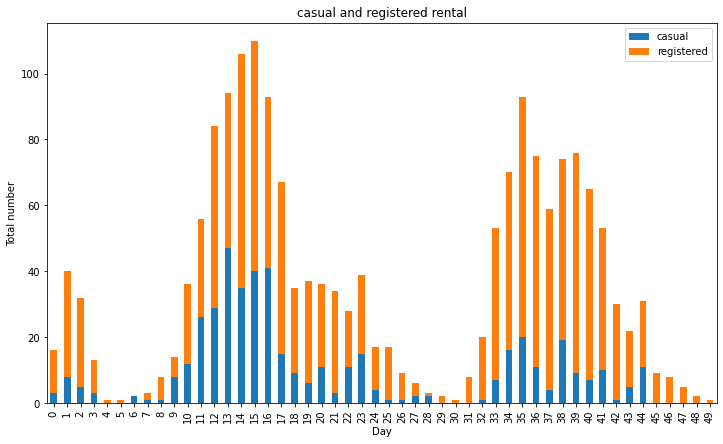

In [31]:
#to calculate casual and registered bike rentals
data_set[['casual', 'registered']][:50].plot(kind='bar', stacked=True)
plot.title("casual and registered rental")
plot.xlabel("Day")
plot.ylabel("Total number")
plot.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
model = RandomForestRegressor()
columns = ['hour', 'month', 'holiday', 'workingday', 'weather']
X= data_set[columns]
print(X)
X= preprocessing.scale(X)
Y = data_set['count'].values
Y = preprocessing.scale(Y)
train_X, test_X, train_Y, test_Y = train_test_split(X,Y, test_size=0.3, random_state=100)
train_X

searching_params= {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 50, 60, 90, 100, None],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [6, 8, 10],
    'n_estimators': [100, 200, 300, 400, 800, 1400, 1600, 1800, 2000]
}
searching = RandomizedSearchCV(estimator = model,
                                       param_distributions = searching_params,
                                       cv = 2, verbose=2,
                                       random_state=42, n_jobs = -1)
searching.fit(train_X,train_Y)
searching.best_params_

      hour  month  holiday  workingday  weather
0        0      1        0           0        1
1        1      1        0           0        1
2        2      1        0           0        1
3        3      1        0           0        1
4        4      1        0           0        1
...    ...    ...      ...         ...      ...
9169    19     12        0           0        1
9170    20     12        0           0        2
9171    21     12        0           0        2
9172    22     12        0           0        2
9173    23     12        0           0        2

[9174 rows x 5 columns]
Fitting 2 folds for each of 10 candidates, totalling 20 fits


{'n_estimators': 2000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': 100,
 'bootstrap': True}

In [54]:
model.fit(train_X,train_Y)
predict_count = model.predict(test_X)

calculate_RMS = np.sqrt(mean_squared_error(test_Y,predict_count))
print("Calculated RMS error is:",calculate_RMS)
print("Calculated r2_score is:", r2_score(test_Y, predict_count))

Calculated RMS error is: 0.4746371879656946
Calcualted r2_score is: 0.7648379872469515


In [56]:
# Saving completed data to csv file
model.fit( data_set[columns], data_set['count'])
pred_count = model.predict(data_set[columns])
data_set['count'] = pred_count
tested_value = data_set[['datetime','count']].to_csv('nitesh_timalsina_lab06.csv',
    index=False, header=True)
print("File is saved as nitesh_timalsina_lab06.csv after the completion of prediction")


File is saved as nitesh_timalsina_lab06.csv after the completion of prediction


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [7]:
### You code here:

